In [3]:



from sqlalchemy import create_engine, text

import sys
sys.path.append("..")

from pyquacache import queries

from pyquacache.defs.config import db_url_prod as db_url
import pandas as pd

In [ ]:
param_query = """
SELECT * FROM parameters
"""

with engine.connect() as conn:
    param_result = conn.execute(text(param_query))
    parameters_df = pd.DataFrame(param_result.fetchall(), columns=param_result.keys())

param_name_dict = parameters_df.set_index("parameter_id").loc[:,"param_name"].to_dict()

query = """
SELECT * 
FROM locations
"""

engine = create_engine(db_url)
with engine.connect() as connection:
    table_result = connection.execute(
        text(query)
    )

df = pd.DataFrame(table_result)    
df.loc[["hyland" in name.lower() for name in df["name"]]]

,location,name,latitude,longitude,note,contact,location_id,geom_id,name_fr,share_with,...,current_purpose,location_images,jurisdictional_relevance,anthropogenic_influence,sentinel_location,created_by,modified_by,private_expiry,created,modified
92,10AD-M2,Hyland North Meteorological,61.580199999999998,-128.30507000000000,None,None,169,250,Hyland nord (station météorologique),[public_reader],...,None,None,True,False,False,postgres,admin,None,2025-08-12 18:05:42.421677+00:00,2026-01-02 19:11:26.887434+00:00
93,10AD-SC01B,Hyland River B Snow Course,61.580199999999998,-128.30506944444400,None,None,170,288,Rivière Hyland B (parcours nivométrique),[public_reader],...,None,None,True,False,False,postgres,admin,None,2025-08-12 18:05:42.421677+00:00,2026-01-02 19:11:26.896393+00:00
286,10AD002,Hyland River At Kilometre 108.5 Nahanni Range ...,61.486808776855469,-128.24214172363281,None,None,171,219,"Rivière Hyland (km 108,5 du chemin Nahanni Range)",[public_reader],...,None,None,True,False,False,postgres,admin,None,2025-08-12 18:05:42.421677+00:00,2026-01-02 19:11:27.711506+00:00


In [ ]:
loc_name = "Hyland River At Kilometre 108.5 Nahanni Range Road"
loc_name = "Hyland North Meteorological"


# Query to get all timeseries ids, their continuous_timeseries flag, and parameter_id for the location
loc_query = f"""
SELECT *
FROM locations l
WHERE l.name = '{loc_name}'
"""

with engine.connect() as conn:
    res = conn.execute(text(loc_query))
    locs = pd.DataFrame(res.fetchall(), columns=res.keys())

locs.to_csv("hyland_north_locations.csv")


In [ ]:

# Query to get all timeseries ids, their continuous_timeseries flag, and parameter_id for the location
ts_query = f"""
SELECT cd.datetime, cd.value, t.parameter_id
FROM timeseries t
JOIN locations l ON t.location_id = l.location_id
JOIN measurements_continuous cd ON t.timeseries_id = cd.timeseries_id
WHERE l.name = '{loc_name}'
"""

with engine.connect() as conn:
    res = conn.execute(text(ts_query))
    ts = pd.DataFrame(res.fetchall(), columns=res.keys())


ts = ts.set_index("datetime")


ts = ts.pivot(columns="parameter_id", values="value")
ts = ts.apply(pd.to_numeric)
ts.rename(columns=param_name_dict, inplace=True)




In [102]:
ts

parameter_id,snow water equivalent,"precipitation, total",snow depth,"temperature, air"
datetime,,,,
1992-10-15 08:00:00+00:00,0.000000,NaN,NaN,NaN
1992-10-16 08:00:00+00:00,0.446317,NaN,NaN,NaN
1992-10-17 08:00:00+00:00,0.892634,NaN,NaN,NaN
1992-10-18 08:00:00+00:00,1.338951,NaN,NaN,NaN
1992-10-19 08:00:00+00:00,1.785268,NaN,NaN,NaN
...,...,...,...,...
2026-01-07 14:00:00+00:00,NaN,NaN,NaN,-15.6
2026-01-07 15:00:00+00:00,156.000000,NaN,86.785787,-15.4
2026-01-07 16:00:00+00:00,NaN,NaN,NaN,-15.4


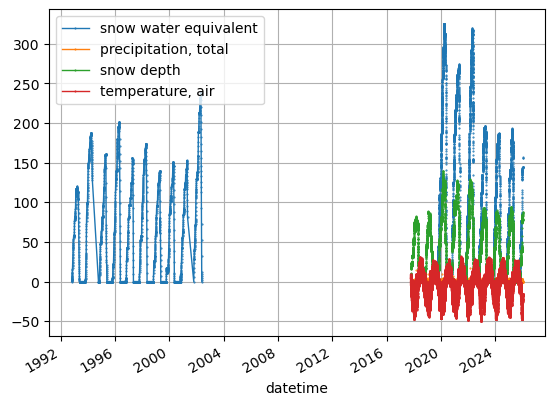

In [110]:
import matplotlib.pyplot as plt


ts.plot(marker='.', linewidth=1, markersize=1)
plt.legend(loc='upper left')
plt.grid()

In [92]:
ts.to_csv("hyland_north_timeseries.csv")

In [57]:
ts.loc[ts["parameter_id"] == 34,:]

,datetime,value,parameter_id
128457,2017-10-06 21:00:00+00:00,0E-17,34
128458,2017-10-07 00:00:00+00:00,1.00000000000000000,34
128459,2017-10-07 03:00:00+00:00,0E-17,34
128460,2017-10-07 06:00:00+00:00,0E-17,34
128461,2017-10-07 09:00:00+00:00,0E-17,34
...,...,...,...
152509,2026-01-06 12:00:00+00:00,1,34
152510,2026-01-06 15:00:00+00:00,0,34
152511,2026-01-06 18:00:00+00:00,1,34
152512,2026-01-06 21:00:00+00:00,0,34


<Axes: xlabel='datetime'>

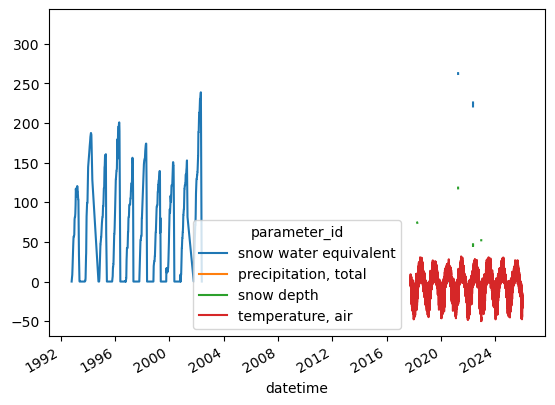

In [ ]:
ts_pivot = ts.pivot(index="datetime", columns="parameter_id", values="value")

ts_pivot = ts_pivot.apply(pd.to_numeric)



ts_pivot.plot()


<Axes: xlabel='datetime'>

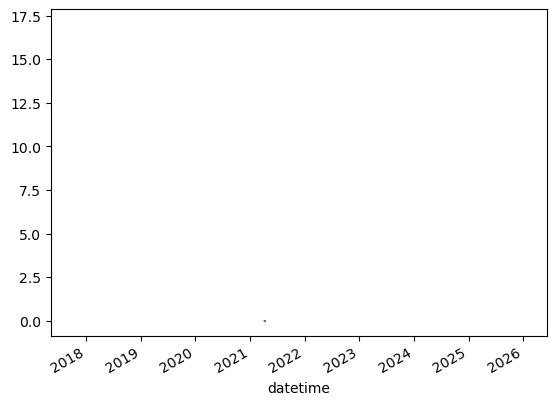

In [45]:
ts_pivot["precipitation, total"].plot()

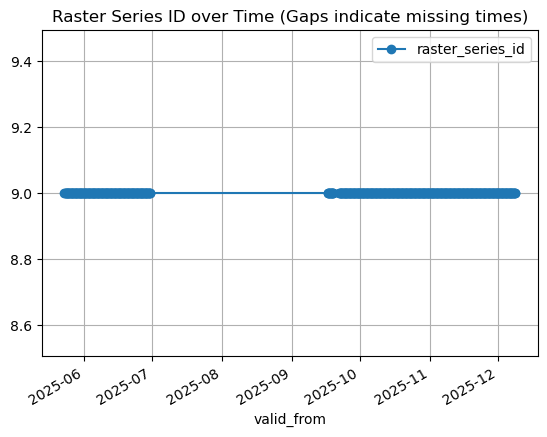

In [74]:

df = df.sort_values("valid_from")
ax = df.plot(x="valid_from", y="raster_series_id", marker='o', linestyle='-')
ax.set_title("Raster Series ID over Time (Gaps indicate missing times)")
plt.grid()

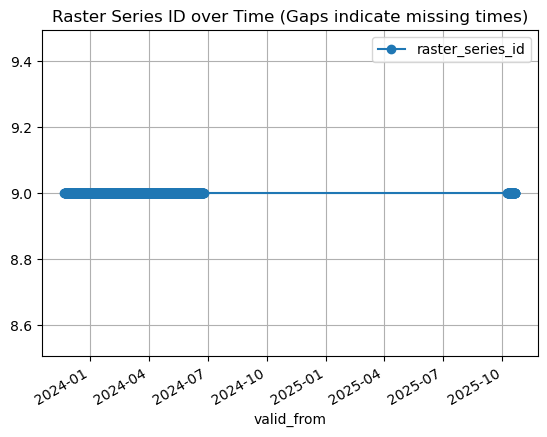

In [ ]:
from pyquacache import queries

from pyquacache.defs.config import db_url_dev as db_url
import pandas as pd

query = """
SELECT rr.* 
FROM spatial.raster_series_index rsi
JOIN spatial.rasters_reference rr
    ON rsi.raster_series_id = rr.raster_series_id
WHERE rsi.model = 'HRDPA'
"""

engine = create_engine(db_url)
with engine.connect() as connection:
    table_result = connection.execute(
        text(query)
    )

df = pd.DataFrame(table_result)    

df = df.sort_values("valid_from")
ax = df.plot(x="valid_from", y="raster_series_id", marker='o', linestyle='-')
ax.set_title("Raster Series ID over Time (Gaps indicate missing times)")
plt.grid()